# HEALTH INSURANCE RECOMMENDER SYSTEM

#### ABSTRACT.
Access to affordable and tailored health insurance is a major challenge in Kenya due to diverse economic, health, and demographic factors. The Health Insurance Recommender System aims to provide personalized insurance recommendations based on an individual’s age, income, employment status, medical history, and lifestyle choices.

With the growing prevalence of chronic illnesses in Kenya and the rising demand for affordable and accessible insurance, this solution aims to enhance informed decision-making.

Using machine learning and data analytics, the system evaluates pre-existing conditions, healthcare expenditure, hospital preferences, and policy features to match users with the most suitable health insurance plans. This data-driven approach enhances decision-making for both insurance providers and policyholders, ensuring greater accessibility, affordability, and improved healthcare outcomes.

#### INTRODUCTION
Access to quality healthcare is a global challenge, with millions relying on health insurance to manage medical expenses. However, having the right plan is complex, especially for individuals with pre-existing conditions like asthma, cancer, diabetes, HIV, and hypertension. In Kenya, healthcare coverage is provided through public (NHIF) and private insurers, yet many remain uninsured or underinsured due to high costs, limited coverage, and lack of guidance.

To address this, we propose a Health Insurance Recommender System that uses machine learning to offer personalized policy recommendations based on an individual’s medical history, financial status, and coverage preferences. By simplifying the decision-making process, this system aims to increase insurance adoption, enhance financial protection, and improve healthcare accessibility, particularly for those with chronic conditions.

#### PROBLEM STATEMENT 

Access to affordable and suitable health insurance remains a major challenge in Kenya, particularly for individuals with **pre-existing conditions** such as **asthma, cancer, diabetes, HIV, and hypertension**. Many people struggle to find insurance plans that provide **adequate coverage at a reasonable cost**, leading to **underinsurance or complete lack of coverage**.  

#### Key Challenges:  
- **Complexity of insurance policies**, making it difficult for individuals to understand coverage options.  
- **High costs of private insurance**, which limit accessibility for low- and middle-income individuals.  
- **Limited coverage of public insurance (NHIF)** for chronic illnesses and specialized treatments.  
- **Lack of personalized recommendations**, leading to poor decision-making and enrollment in inadequate plans.  

To address these challenges, there is a need for a **data-driven solution** that simplifies insurance selection by providing **personalized recommendations** based on an individual’s **health status, financial capacity, and coverage needs**.
 A **Health Insurance Recommender System** leveraging **machine learning** can bridge this gap by analyzing **user profiles** and matching individuals with the most **suitable and cost-effective insurance plans**.

#### OBJECTIVES
  

1. Develop a **Health Insurance Recommender System** that provides **personalized insurance recommendations** by analyzing users' **medical history, financial capacity, and coverage needs**.  

2. Implement **demographic-based recommendations, collaborative filtering, and default user profiles** to ensure relevant insurance suggestions, even for users with minimal historical data.  

3. Analyze the impact of **socioeconomic factors** such as **age, gender, income, and location** on **health insurance adoption and affordability**.  

4. Identify gaps in **insurance coverage** by evaluating how individuals with **chronic illnesses** (asthma, diabetes, hypertension, cancer, HIV) are insured across different income levels.  

5. Develop an **affordability-based segmentation model** to recommend cost-effective plans for **low-income individuals** while ensuring adequate coverage for chronic conditions.  

6. Assess the influence of **policy attributes** (e.g., **premium costs, deductibles, and benefits**) on user preferences and decision-making in health insurance selection.  


#### SYNTHETIC DATA LIMITATIONS.
1. **Limited Real-World Complexity**  
   - The dataset may not fully reflect the complexity of real-world health insurance data, missing unexpected trends, outliers, and extreme cases that naturally occur in diverse populations.  

2. **Potential Bias in Data Distribution**  
   - The data generation process may introduce biases, such as **evenly distributed income levels, unrealistic correlations between variables, or oversimplified health conditions**, leading to skewed insights.  

3. **Absence of Real-World Behavioral Patterns**  
   - Unlike real datasets that capture **human decision-making, preferences, and external influences** (e.g., government policies, economic changes), synthetic data lacks genuine behavioral trends.  

4. **No Ground Truth for Validation**  
   - Since the dataset is not based on **actual surveys, insurance records, or real healthcare data**, there is no **authentic benchmark** to validate the accuracy of findings, limiting the reliability of insights.  

5. **Simplified Insurance Plan Attributes**  
   - The dataset may exclude **critical insurance factors** such as **policy exclusions, co-payment requirements, waiting periods, and insurer reputation**, which significantly influence real-world insurance choices.  





### DATA LOADING LOADING AND INSPECTION

##### Loading the dataset

In [13]:
#Importing the necessary libraries
import pandas as pd
import numpy as np

df1 = pd.read_excel("D:\PROJECT\Health-Insurance-Recommender-System\health_insurance_features_definitions.xlsx")
df1.head()



,Feature,Definition
0,user_id,Unique identifier for each user
1,age,Age of the user
2,gender,"Gender of the user (Male, Female, Other)"
3,country,Country of residence
4,monthly_income,User's monthly income in USD


In [14]:
df1.tail()

,Feature,Definition
18,co_payment_preference,"User's preference for co-payment level (Low, M..."
19,lifetime_coverage_limit,Maximum lifetime coverage amount in USD
20,claim_reimbursement_speed,"Speed of claim reimbursement (Fast, Medium, Slow)"
21,insurance_effective_time,Time taken for the insurance plan to start bei...
22,target_plan,Recommended insurance plan based on user profile


In [11]:
df2 = pd.read_csv("D:\PROJECT\Health-Insurance-Recommender-System\health_insurance_recommender.csv")
df2.head()

,user_id,age,gender,country,region,employment_status,monthly_income,pre_existing_conditions,number_of_dependents,current_health_expenditure,...,education_level,recent_hospital_visits,smoking_habit,alcohol_consumption,existing_medications,disability_status,co_payment_preference,lifetime_coverage_limit,preferred_hospital,claim_reimbursement_speed
0,1,78.0,Female,Kenya,Urban,Self-Employed,342.147528,Cancer,2,2614.37,...,Bachelor's,5,No,Yes,No,Yes,High,50000,Life Healthcare,Medium
1,2,27.0,Male,Kenya,Semi-Urban,Unemployed,23.271139,None,1,3343.49,...,Master's,10,Yes,Yes,No,Yes,High,1000000,Netcare,Slow
2,3,74.0,Male,Kenya,Urban,Unemployed,7605.332784,None,5,4615.26,...,Diploma,1,No,Yes,Yes,Yes,High,1000000,Netcare,Fast
3,4,38.0,Male,Kenya,Rural,Employed,2349.243288,Cancer,3,612.38,...,Diploma,5,No,Yes,No,No,High,1000000,Netcare,Medium
4,5,43.0,Male,Kenya,Urban,Employed,17.187938,Asthma,4,2314.12,...,Bachelor's,0,No,Yes,No,Yes,High,1000000,Aga Khan Hospital,Fast


In [15]:
df2.tail()

,user_id,age,gender,country,region,employment_status,monthly_income,pre_existing_conditions,number_of_dependents,current_health_expenditure,...,education_level,recent_hospital_visits,smoking_habit,alcohol_consumption,existing_medications,disability_status,co_payment_preference,lifetime_coverage_limit,preferred_hospital,claim_reimbursement_speed
52495,6270,35.0,Male,Kenya,Semi-Urban,Employed,15.893020,None,3,3499.20,...,High School,5,Yes,Yes,Yes,No,Low,50000,Life Healthcare,Slow
52496,2178,41.0,Female,Kenya,Rural,Self-Employed,49.476436,Cancer,3,3036.13,...,Bachelor's,8,Yes,No,Yes,No,High,0,Life Healthcare,Medium
52497,25231,58.0,Other,Kenya,Semi-Urban,Unemployed,2314.782792,HIV,2,4483.59,...,PhD,5,No,Yes,No,Yes,Low,1000000,Mediheal,Slow
52498,8637,50.0,Other,Kenya,Rural,Unemployed,11.434256,Asthma,0,1676.98,...,High School,0,No,Yes,No,No,High,500000,Life Healthcare,Medium
52499,33073,37.0,Other,Kenya,Semi-Urban,Unemployed,10147.409780,HIV,3,855.74,...,PhD,7,No,Yes,Yes,No,High,50000,Mediheal,Medium


The contents of df1 is a description of the columns and the explanations.
Df2 is now the dataset I will use for the whole project.

In [19]:
df2.shape

(52500, 42)

In [16]:
#Data information.
df2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 52500 entries, 0 to 52499
Data columns (total 42 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   user_id                      52500 non-null  int64  
 1   age                          49859 non-null  float64
 2   gender                       52500 non-null  object 
 3   country                      52500 non-null  object 
 4   region                       52500 non-null  object 
 5   employment_status            52500 non-null  object 
 6   monthly_income               49864 non-null  float64
 7   pre_existing_conditions      52500 non-null  object 
 8   number_of_dependents         52500 non-null  int64  
 9   current_health_expenditure   52500 non-null  float64
 10  hospital_preference          52500 non-null  object 
 11  previous_insurance_coverage  52500 non-null  object 
 12  preferred_coverage_type      52500 non-null  object 
 13  insurance_provid

In [18]:
#Description
df2.describe()

,user_id,age,monthly_income,number_of_dependents,current_health_expenditure,plan_cost,deductible_amount,out_of_pocket_max,user_satisfaction_rating,duplicate_plan_cost,waiting_period_months,family_size,recent_hospital_visits,lifetime_coverage_limit
count,52500.000000,49859.000000,49864.000000,52500.000000,52500.000000,52500.000000,52500.000000,52500.000000,49881.000000,52500.000000,52500.000000,52500.000000,52500.000000,52500.000000
mean,24980.571486,48.535911,2229.294781,2.492286,2542.757659,599.710239,113.864270,381.808335,3.001423,27581.730840,4.911219,3.501067,4.990590,315353.333333
std,14433.032416,17.922048,3993.264625,1.705581,1416.930992,1029.239746,200.843563,634.008554,1.419540,13051.249725,6.010216,1.709279,3.155993,347630.969987
min,1.000000,18.000000,1.281549,0.000000,100.030000,1.260237,0.126121,1.260728,1.000000,5000.160000,0.000000,1.000000,0.000000,0.000000
25%,12479.750000,33.000000,59.004709,1.000000,1316.652500,22.398519,3.185938,21.623265,2.000000,16220.612500,1.000000,2.000000,2.000000,50000.000000
50%,24974.500000,48.000000,611.079480,2.000000,2540.765000,168.510240,31.528224,107.380008,3.000000,27641.475000,3.000000,4.000000,5.000000,100000.000000
75%,37471.250000,64.000000,1360.548180,4.000000,3766.235000,354.352950,69.125184,215.736066,4.000000,38970.142500,6.000000,5.000000,8.000000,500000.000000
max,50000.000000,79.000000,19434.987400,5.000000,4999.990000,4859.763804,971.922240,2915.811432,5.000000,49999.710000,24.000000,6.000000,10.000000,1000000.000000


## Summary of Dataset Description  

**Insights from the descriptive statistics:**  

- **Age Range**: Users are between **18 and 79 years old**, with an average age of **48.5 years**.  
- **Monthly Income**: Varies significantly, with an average of **2,229** and a maximum of **19,434**.  
- **Health Expenditure**: Users spend an average of **2,542** on healthcare, with a max of **4,999**.  
- **Plan Cost & Deductibles**: The average **plan cost** is **599**, while deductibles range from **0.12 to 971**.  
- **User Satisfaction Rating**: Ranges from **1 to 5**, with a median of **3**, indicating **moderate satisfaction**.  
- **Family & Dependents**: Most users have **2-5 dependents**, with a max **family size of 6**.  
- **Lifetime Coverage Limit**: Ranges widely, from **0 to 1,000,000**, with a median of **100,000**.  




## EXPLANATORY DATA ANALYSIS

##### Check for missing values

In [23]:
# Select columns with missing values
missing_values = df2.isnull().sum()
missing_columns = missing_values[missing_values > 0]
print(missing_columns)


age                         2641
monthly_income              2636
user_satisfaction_rating    2619
dtype: int64


In [27]:
#Checking the percentages of the missing vlaues in these columns.
# Select the columns with missing values
missing_columns = ['age', 'monthly_income', 'user_satisfaction_rating']

# Calculate the percentage of missing values
missing_percentage = (df2[missing_columns].isnull().sum() / len(df2)) * 100

# Display the results
print(missing_percentage)


age                         5.030476
monthly_income              5.020952
user_satisfaction_rating    4.988571
dtype: float64


**Handling the missing values on the three columns**

**Visual Representation of the columns with the missing values**.

This is to check the distribution so at to use the bset method on handling the missing values.

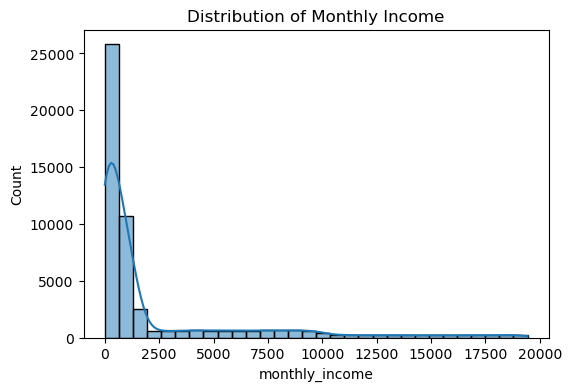

In [28]:
import matplotlib.pyplot as plt
import seaborn as sns

# Plot histogram for numerical features
plt.figure(figsize=(6, 4))
sns.histplot(df2['monthly_income'], bins=30, kde=True)  # kde=True adds a smooth density curve
plt.title('Distribution of Monthly Income')
plt.show()


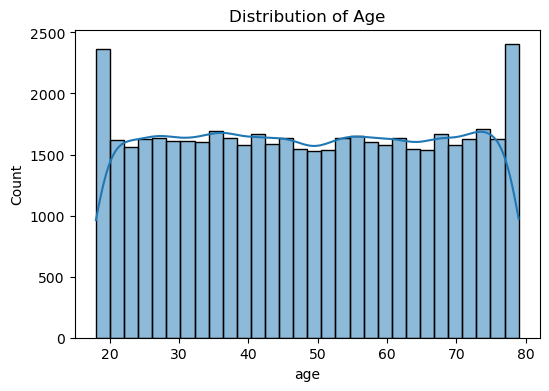

In [29]:
import matplotlib.pyplot as plt
import seaborn as sns

# Plot histogram for numerical features
plt.figure(figsize=(6, 4))
sns.histplot(df2['age'], bins=30, kde=True)  # kde=True adds a smooth density curve
plt.title('Distribution of Age')
plt.show()

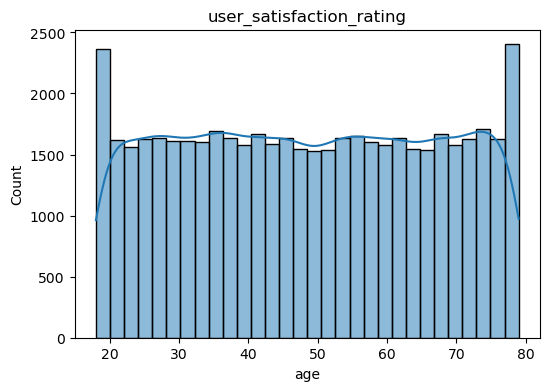

In [30]:
# Plot histogram for numerical features
plt.figure(figsize=(6,4))
sns.histplot(df2['age'], bins=30, kde=True)  # kde=True adds a smooth density curve
plt.title('user_satisfaction_rating')
plt.show()

## Summary

- **Monthly Income:**
It is highly skewed to the right (positively skewed), meaning there are many low-income values and a few extremely high-income values.
Mean is not the best choice because it is affected by the outliers (high values).

**median** to handle missing values due to right-skewness.  
- **Age:** **median**   
The age histogram appears uniformly distributed with some peaks at the boundaries.
Since it is not strongly skewed, mean or median can be used for imputation.
However, if there are clear clusters or outliers, median is the safer option.

- **User Satisfaction Rating:**  
  -**mode**.  
   
